<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

In the previous chapter, we saw how you could use Matplotlib to produce simple, decent-looking plots. However, we haven’t really (barely) tapped the full power of what Matplotlib can do. For this, I need to introduce you to a different way of speaking to Matplotlib. So far, the ‘dialect’ we have used to talk to Matplotlib is called the Matlab-like __pyplot(`plt`) interface__. From here onward, I will show you how to use the other, more powerful ‘dialect’ called the __Object Oriented (OO) interface__. This way of talking to Matplotlib gives us a more nuanced control over what is going on by allowing us to __manipulate the various axes easily.__

# 1 Some nomenclature

Before going ahead, let’s distinguish between a Matplotlib `figure` and an `axis`.

- A figure is simple; it is the full canvas you use to draw stuff on.
- An axis is the individual mathematical axes we use for plotting. So, one figure can have multiple axes, as shown below, where we have a (single) figure with four axes.

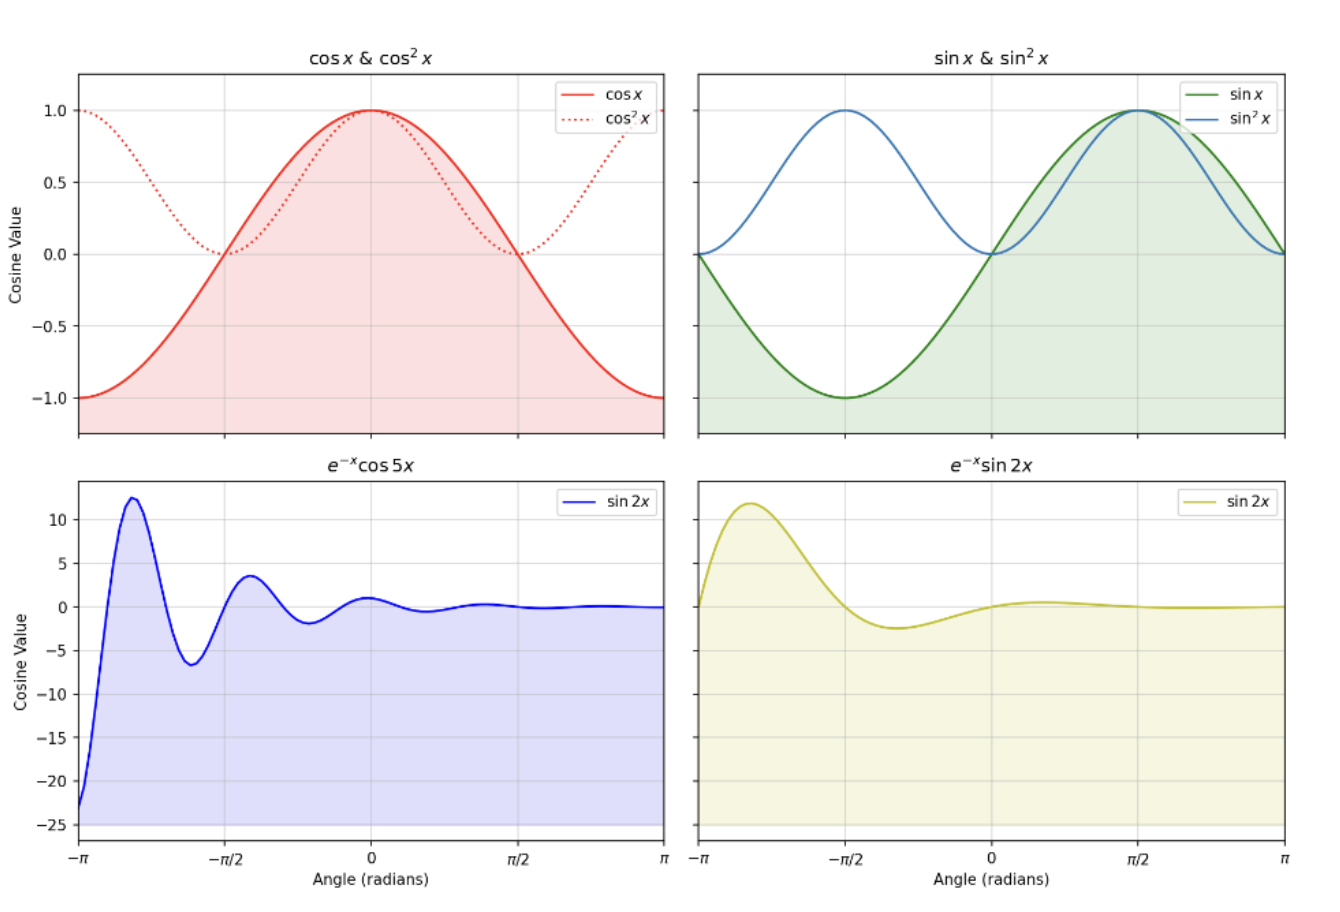

By the way, you had already encountered a situation with multiple axes in the last chapter when we used twinx(). It is not uncommon to struggle with the concept of axes; but don’t worry; it will become clearer as we work through this chapter.



# 2 Comparing the two ‘dialects’

Let me create the same plot using both `pyplot` and OO _‘dialects’_ so that you can see how the latter works. The plot I will be creating is shown below.

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

Now the comparison; remember that both sets of code (the pyplot and OO interface) will produce the same plot.

### `pyplot` Interface

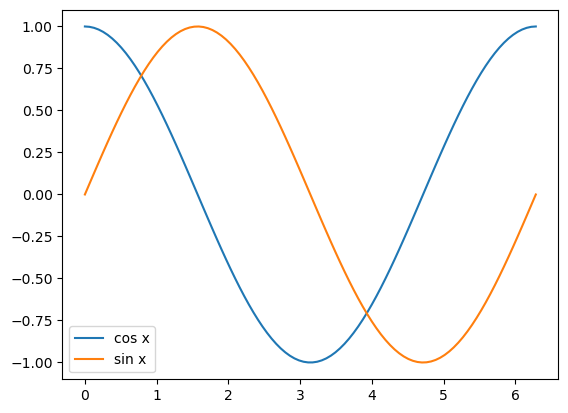

In [10]:
# Generate some x values using numpy
x = np.linspace(0, 2 * np.pi, 100)

# Calculate the cosine and sine values for the x values
cos_x = np.cos(x)
sin_x = np.sin(x)

# Plot both the cosine and sine functions on the same plot with labels
plt.plot(x, cos_x, label='cos x')  # Plot the cosine function with a label
plt.plot(x, sin_x, label='sin x')  # Plot the sine function with a label

# Add a legend to the plot to distinguish between the cosine and sine functions
plt.legend()

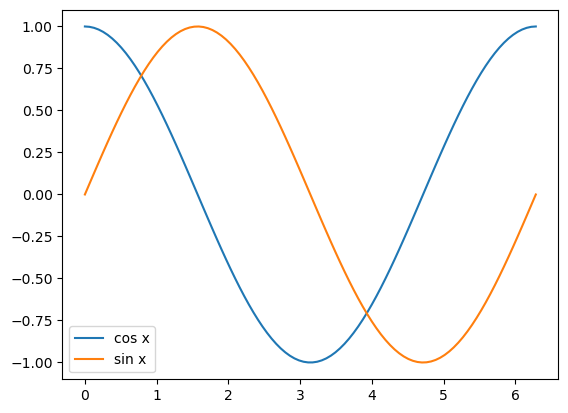

In [11]:

# Create a new figure and axis object
fig, ax = plt.subplots(nrows=1, ncols=1)

# Plot the cosine and sine functions on the axis with labels
ax.plot(x, cos_x, label='cos x')  # Plot the cosine function with a label on the axis
ax.plot(x, sin_x, label='sin x')  # Plot the sine function with a label on the axis

# Add a legend to the axis to distinguish between the cosine and sine functions
ax.legend()

### OO Interface

For the OO interface, we have to start by using `subplots()` to ask Matplotlib to create a figure and an axis. Matplotlib obliges and gives us a figure (`fig`) and an axis (`ax`).

Although I have used the variables `fig` and `ax` you are _free to call them whatever you like_. But this is what is commonly used in the documentation. 

In this example, I need only one column and one row. But, if I want, I can ask for a grid like in the plot right at the top.

Yes, the __`OO`__ looks more comlicated than the `pyplot` version. But, it __offers so much freedom__ that it is worth learning it for more demanding, complex plots. You will see this soon.

__Remember:__ Remember to use the pyplot interface for quick and dirty plots and the OO interface for more complex plots that demand control and finesse.


# 3 What is OO ax, really?

The code below creates the (crude) plot shown on the right. Let’s look at what is happening so that we can understand what is going on.

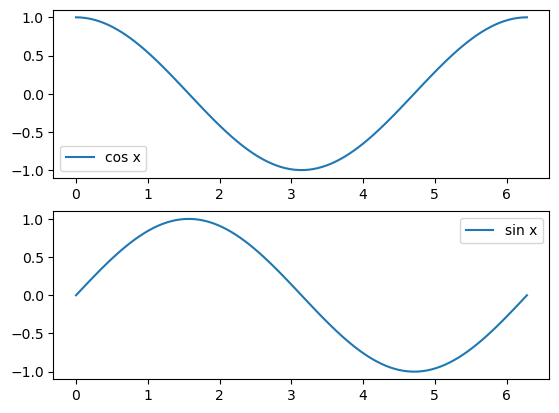

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1) #ask for two rows and one column using subplots

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

In [16]:
#This should give me two axes so that I can plot in both panes. 
#Let’s quickly check a few more details about ax.

#What's ax?
type(ax)

numpy.ndarray

In [17]:
#So ax is a numpy array

#What's the size of ax?
ax.shape

(2,)

In [18]:
#As expected it has two 'things'

#What's contained in ax?
type(ax[0])

matplotlib.axes._axes.Axes

This is a Matplotlib axis.

# 4 A complete OO example

The following is a simple example that __creates a nicer, tweaked version of the previous plot.__

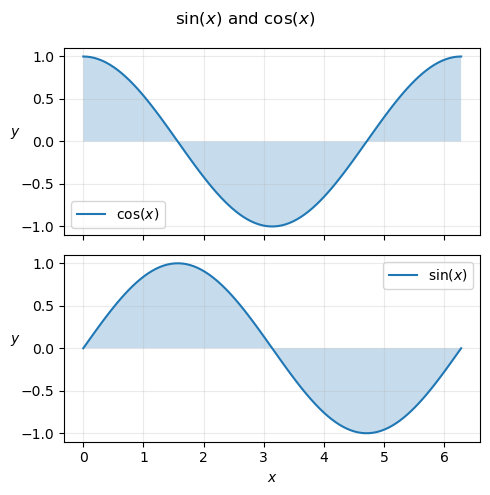

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

Now, lets try to __explain what is happening.__

```python
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)


ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)


ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

fig.tight_layout()
```

is saying...

- Set up the axes and figure
    - Get two axes ready to plot in two rows in one column.
    - Change the size of the figure by specifying a figure size (`figsize`).
    - Ask that the plots share the $x$ axis using sharex.
- Since ax is a NumPy array with two axes, we can index them using 0 and 1. Then we just plot to that axis.
- Use `fill_between()` to fill the plots.
    - I have again just indexed the NumPy array to access the axes.
- Draw the legends
    - As in the previous example, we can do this one axis at a time. However, a more sensible way to do this is _with a for loop_ that iterates through the items in ax
    - Let’s also add a grid to each plot and set the label.
- We are sharing the $x$-axis. So, we only need to label the lowest plot. This has the index 1.
- Let’s add a super title to the __figure__ (notplot).
- Finally, let’s ask Matplotlib to make any necessary adjustments to the layout to make our plot look nice by calling `tight_layout()`. It would help if you convinced yourself of the utility of `tight_layout()` by producing the plot with and without it.

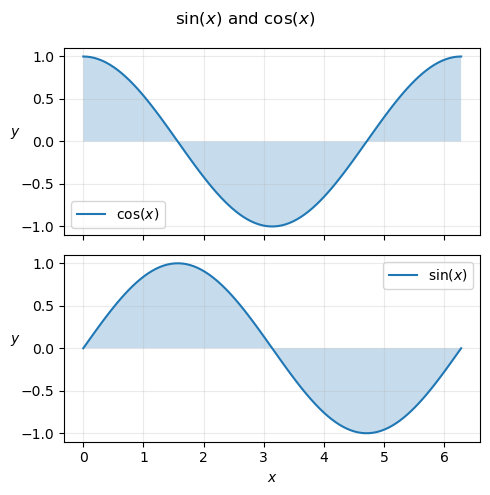

In [24]:
# and when we run it...
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)


ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 0, cos_x, alpha=.25)
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)


ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')

fig.tight_layout() # Tis a method in Matplotlib that automatically adjusts the positions 
                    #of subplots and other elements within a figure 
                    #to ensure that there is no overlap between them. 

# 5 Multiple rows and columns

Now, I will show you how to work with multiple rows and columns that form a grid of plots like the one on the left. However, let’s start by using the figure on the right.

I have intentionally kept it simple (only setting the title and plotting some lines) so that we can identify how ax works.

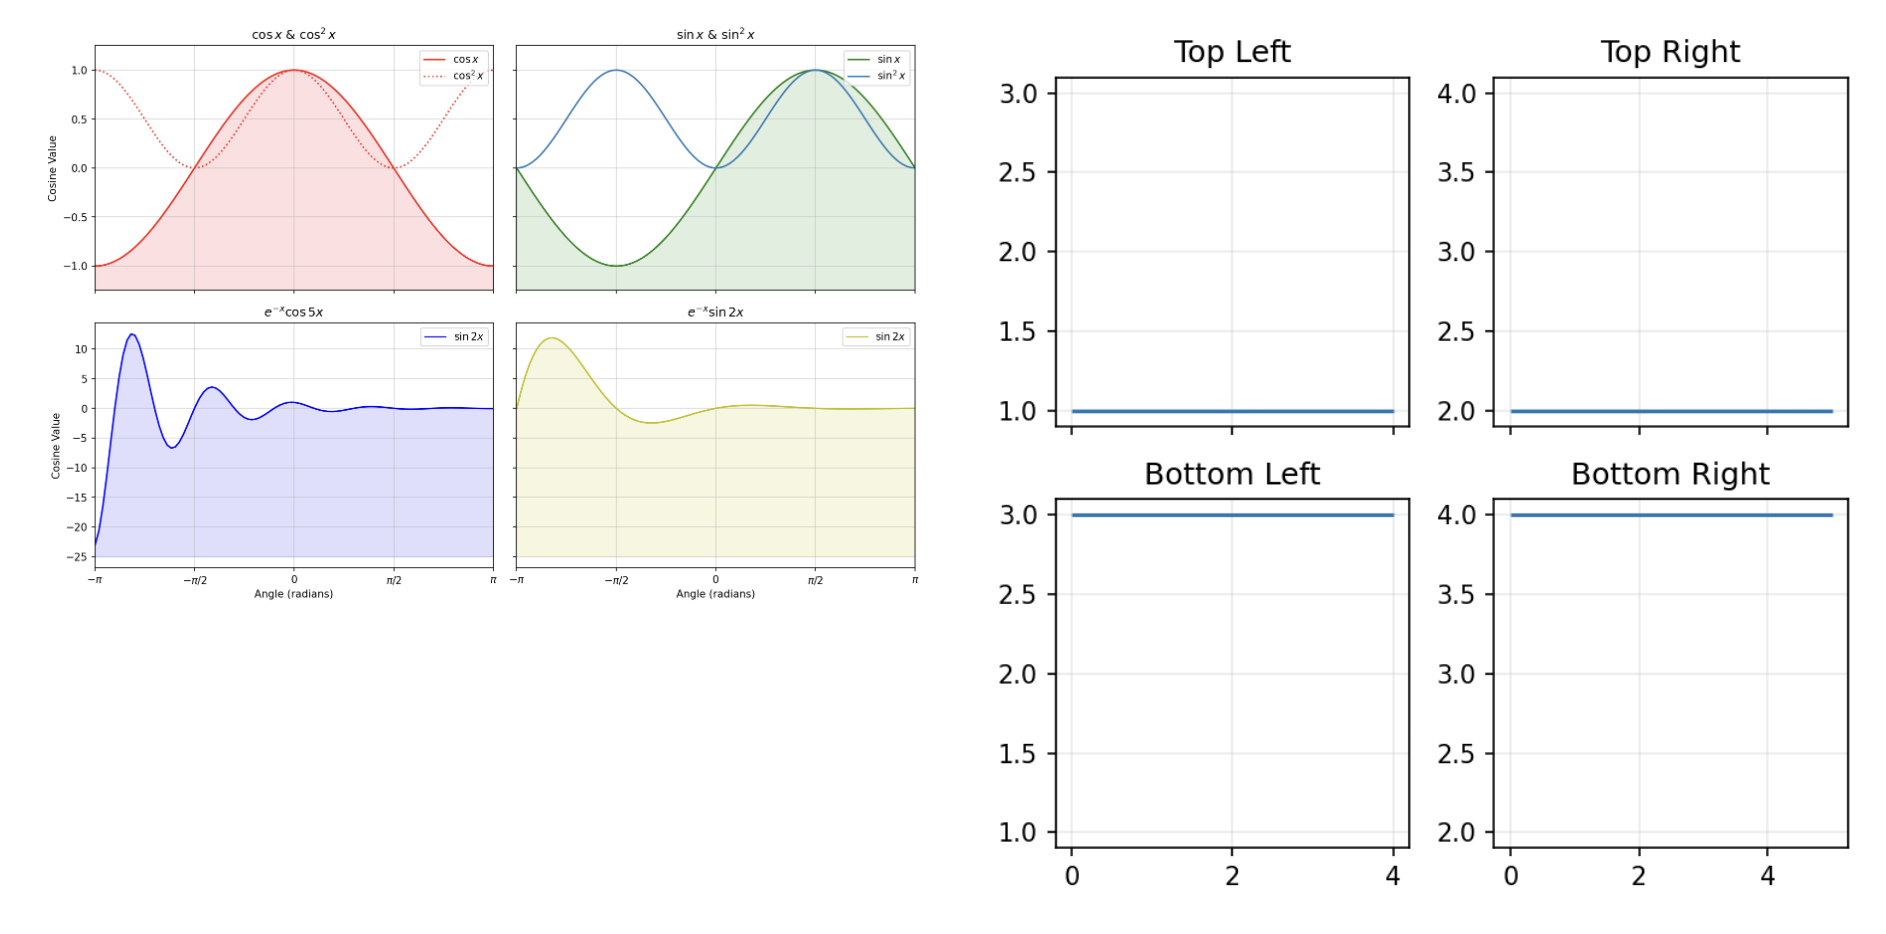

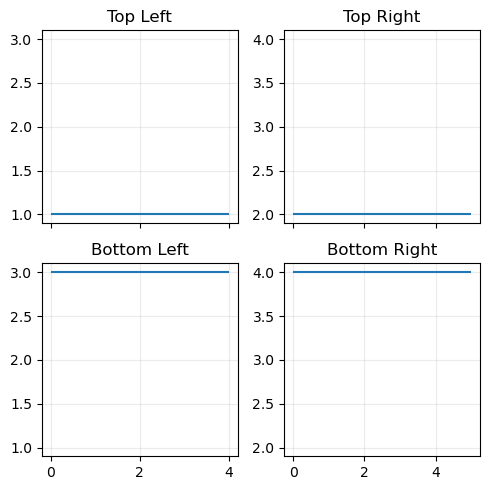

In [40]:
#Code to get the bare bones graphs on the right

fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax (breaking down the above code)

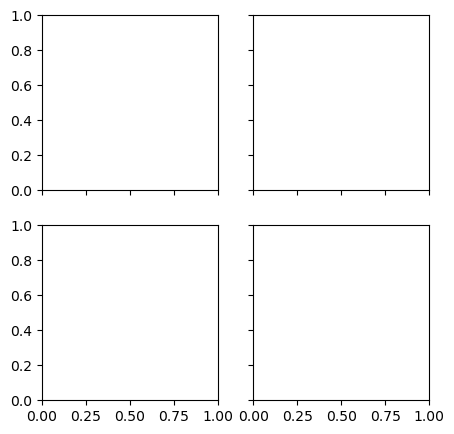

In [39]:
# I create a figure and axes using ax by:
fig, ax = plt.subplots(nrows=2, ncols=2, # two rows and teo columns
                       figsize=(5, 5),
                       sharex='col', sharey='row')


The __most important thing you must understand is how to use ax__.

We know there must be four axes; but __how is ax structured?__ Let’s look at its shape.

In [27]:
ax.shape

(2, 2)

In [ ]:
#So, ax is organised as you see in the figure, as a 2 x 2 array. 
#So, I can ACCESS each of the axes as follows:
ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')


This is a perfectly valid way to use ax. 
However, when you have to tweak each axis separately, I find it easy to USE A FAMILIAR VARIABLE I can do this by:

In [28]:

top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]


In [29]:
#can also use:
top_left, top_right, bottom_left, bottom_right = ax.flatten()

`flatten()` takes the 2D array and ‘flattens’ it into a 1D array; unpacking takes care of the assignments.

 And we drew the lines using the very useful Matplotlib function `hlines()`:
 

In [30]:
top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

Putting it all back together we get:
```python

# I create a figure and axes using ax by:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# Setting respective titles 
top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')
# Or
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

# Setting/drawing respective horizontal lines
top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

#Flatten the 2d array into a 1d array
for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()


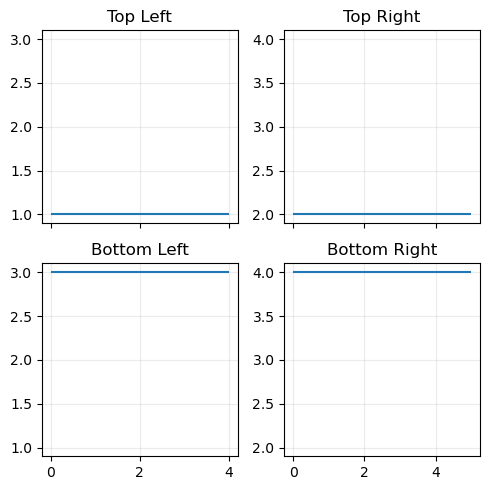

In [41]:
# which produces:

# I create a figure and axes using ax by:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

# Setting respective titles 
top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')
# Or
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

# Setting/drawing respective horizontal lines
top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

#Flatten the 2d array into a 1d array
for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.1 Sharing axes

Notice I have asked Matplotlib to make the plots more compact by sharing the $x$ and $y$ axes using `sharex` and `sharey`.

```python
# If you forgot where...Above we had:
# I create a figure and axes using ax by:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')
```

Let’s first __see what happens if I do _not_ specify how to share.__

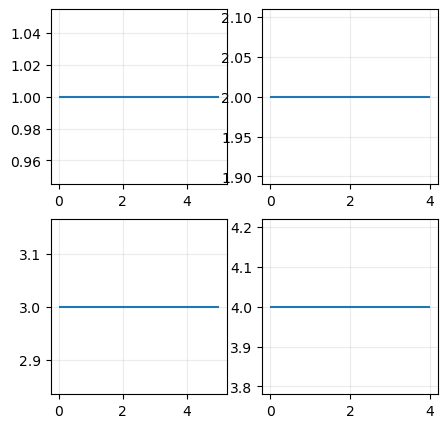

In [51]:
# figsize=(5, 5) sets the size of the figure to 5x5 inches
fig, ax = plt.subplots(
    nrows=2, ncols=2,  # Define the number of rows and columns for the grid of subplots
    figsize=(5, 5))     # Set the size of the figure to 5x5 inches

top_left, top_right = ax[0]
bottom_left, bottom_right = ax[1]

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=4)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=4)

for a in ax.flatten():
    a.grid(alpha=.25)


Without specifying, each plot has it's own specified axis scale.

In [ ]:
With specifiying how to share however:

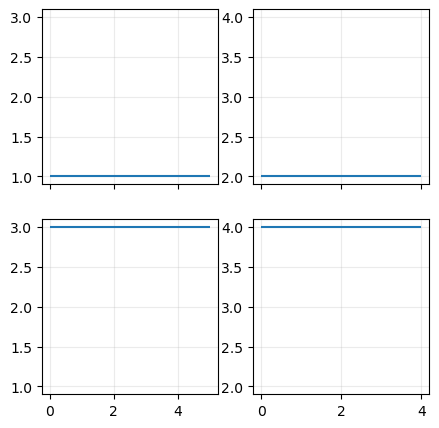

In [53]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

top_left, top_right = ax[0]
bottom_left, bottom_right = ax[1]

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=4)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=4)

for a in ax.flatten():
    a.grid(alpha=.25)


Now, You see that Matplotlib has auto-scaled both axes. In particular, the plots on the left go from 0 to 4, and those on the right go from 0 to 5, as these are the lengths I used for the lines.

- So, in a nutshell, what `sharex='col'` and `sharey='col'` does is make the axis in the same column will have the same x-axis and y-axis limits. 
- Similarly, if you had used `sharex='row'` and `sharey='row'`, the limits would have been shared among subplots along the same row for both x and y.
- And, if you had used `sharex='True'` and `sharey='True'`, the limits would have been shared among all subplots.
- What sharex (for x axis) and sharey (for y axis) are standardised to need not be the same...let's see some examples below"





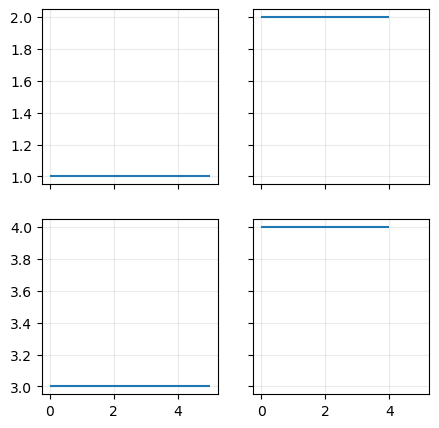

In [55]:
# Let's try sharing by 'True' for the x axis and sharing by 'row' for the y axis
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'
)

top_left, top_right = ax[0]
bottom_left, bottom_right = ax[1]

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=4)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=4)

for a in ax.flatten():
    a.grid(alpha=.25)

# What am I looking at? x-axis scales have been standardised across the board 
# while y-axis has been stadardised by row

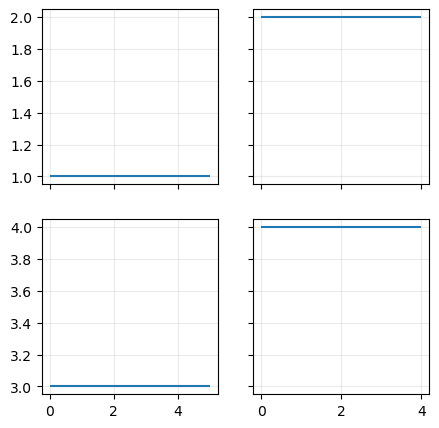

In [57]:
# Another example:
# Let's try sharing by 'col' for the x axis and sharing by 'row' for the y axis
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

top_left, top_right = ax[0]
bottom_left, bottom_right = ax[1]

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=4)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=4)

for a in ax.flatten():
    a.grid(alpha=.25)

# What am I looking at? x-axis scales have been standardised by column (notice how by row they are different) 
# while y-axis has been stadardised by row

## 5.2 Accessing all axes

You will often want to __apply changes to all the axes__, like in the case of the grid. You can do this by:

In [60]:
top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

__Buuuuut__ this is inefficient and requires a lot of work. It is much nicer to use a `for` loop.



In [59]:
for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

In this section, I will quickly show you some useful plots we can generate with Matplotlib.

I will also use a few different __plotting styles__ I commonly use so that you can get a feel for how to change styles.



## 6.1 Histograms

A histogram is a valuable tool for showing distributions of data. 

For this example, I have extracted some actual data from sg.gov related to the __mean monthly earnings of graduates__ from the various universities in Singapore.

### Data


Downloded

### A quick helper function

I will __need to read the data from these files several times__. 

So, I will __create a function called det_plot_data() that I can call__. You must examine the file structure to understand the data and why I am skipping the first line.
(The first row are the headers)

In [62]:
# create a function called det_plot_data() that I can call to read all the data
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data


### The histogram

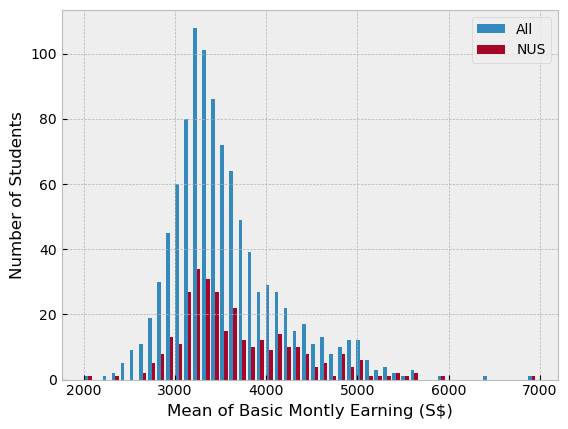

In [63]:
# Making a histogram with this data using plt.hist()

plt.style.use('bmh')
data = get_plot_data() #using the function made above

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()


## 6.2 Scatter 
Scatter plots are created by putting a marker at an point you specify. They are simple yet powerful.

I will be lazy and use the same data as the previous example. But, since I need some values for $x$ I am going to use `range()` along with `len()` to generate a list `[0,1,2...]` appropriate to the dataset.

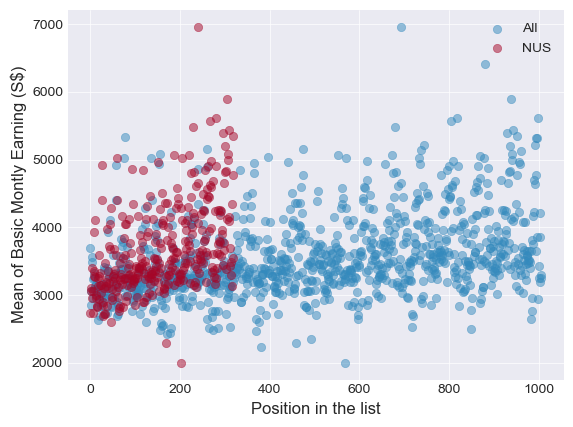

In [65]:
#Creating the Scatter plot using plt.scatter()
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data() # again reading from the data above

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Earning (S$)')
plt.legend()

## 6.3 Bar charts

For this example we're using hypothetical data from a hypothetical class. I extract the data and typecast to pass two lists to `bar()`. Use __`barh()`__ if you want __horizontal__ bars.


Text(0, 0.5, 'Number of Students')

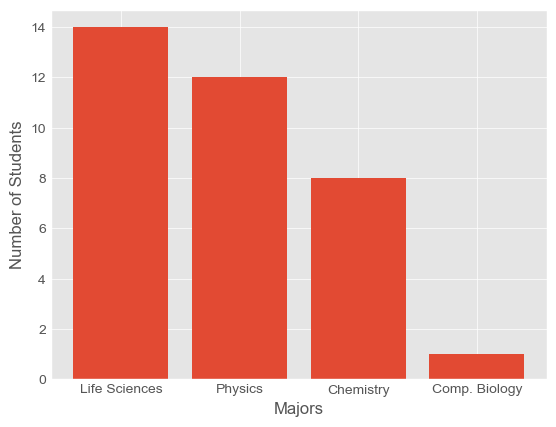

In [66]:
# Making the bar chart using plt.bar()
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers) #defining the x and y axis of the bar chart.
plt.xlabel('Majors')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

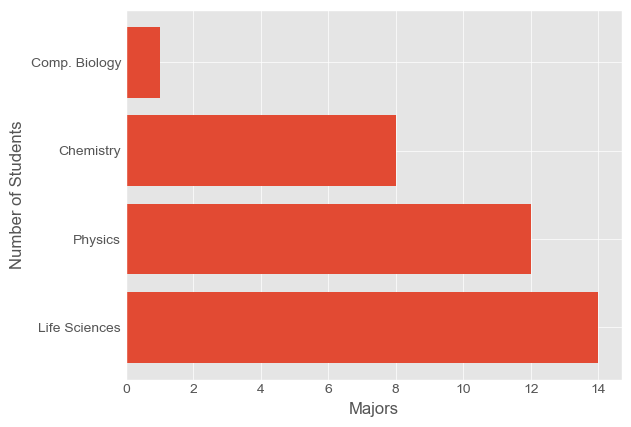

In [67]:
# Could also make the horizontal bar version using plt.barh()
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.barh(majors, numbers) #defining the x and y axis of the bar chart.
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

I am not a big fan of pie charts, but they have their uses. Let me reuse the previous hypothetical data from the hypothetical class.

Text(0.5, 1.0, 'Percentage of each major')

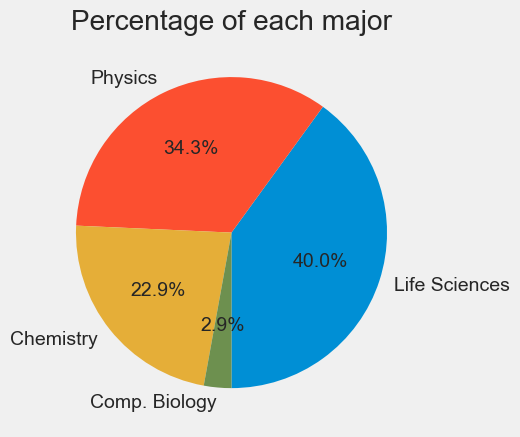

In [68]:
# Making the pie chart using plt.pie()

student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight') #specifying the use of a standardised style
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')